# <a id='toc1_'></a>[Regression Using Pytorch](#toc0_)
In this notebook, we will 
* generate regression data,
* develop model
* save and load model 

**Table of contents**<a id='toc0_'></a>    
- [Regression Using Pytorch](#toc1_)    
  - [Data Creation](#toc1_1_)    
    - [Test Train Split](#toc1_1_1_)    
  - [Model Creation](#toc1_2_)    
    - [Loss function Selection](#toc1_2_1_)    
    - [Optimizer Selection](#toc1_2_2_)    
    - [Running Model](#toc1_2_3_)    
  - [Model Saving](#toc1_3_)    
  - [Model Loading](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [84]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## <a id='toc1_1_'></a>[Data Creation](#toc0_)

In [85]:
features = torch.rand(100)
features

tensor([0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408, 0.1332, 0.9346,
        0.5936, 0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274,
        0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994, 0.5472,
        0.0062, 0.9516, 0.0753, 0.8860, 0.5832, 0.3376, 0.8090, 0.5779, 0.9040,
        0.5547, 0.3423, 0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886,
        0.5895, 0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440, 0.7071,
        0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542, 0.3278, 0.6532,
        0.3958, 0.9147, 0.2036, 0.2018, 0.2018, 0.9497, 0.6666, 0.9811, 0.0874,
        0.0041, 0.1088, 0.1637, 0.7025, 0.6790, 0.9155, 0.2418, 0.1591, 0.7653,
        0.2979, 0.8035, 0.3813, 0.7860, 0.1115, 0.2477, 0.6524, 0.6057, 0.3725,
        0.7980, 0.8399, 0.1374, 0.2331, 0.9578, 0.3313, 0.3227, 0.0162, 0.2137,
        0.6249])

In [86]:
weight = 0.7
bias = .3

In [87]:
output = weight * features + bias

### <a id='toc1_1_1_'></a>[Test Train Split](#toc0_)

In [88]:
x_train, x_test, y_train, y_test = train_test_split( features, output, shuffle=True)
x_train.shape, x_test.shape

(torch.Size([75]), torch.Size([25]))

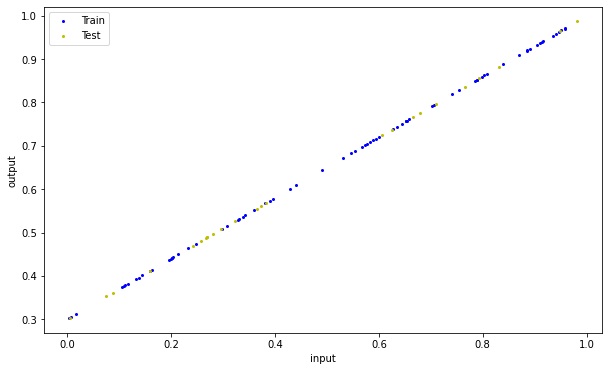

In [89]:
def plot (x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, prediction=None):
    plt.figure(figsize=(10,6))
    plt.scatter(x_train,y_train, color='b', s=4, label="Train")
    plt.scatter(x_test, y_test, color='y', s=4, label="Test")
    if prediction is not None:
        plt.scatter(x_test, prediction, color='g', s=4, label="Prediction")
    plt.ylabel("output")
    plt.xlabel('input')
    plt.legend()

plot()

## <a id='toc1_2_'></a>[Model Creation](#toc0_)

In [90]:
class Regresser(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

    def forward(self, x):
        return x * self.weight + self.bias
    

In [91]:
torch.manual_seed(42)
model = Regresser()
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

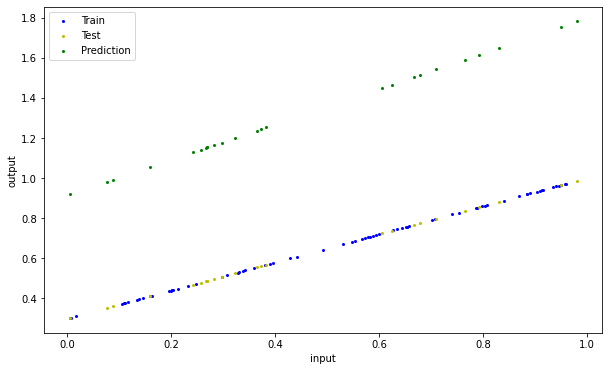

In [92]:
with torch.inference_mode():
    pred = model(x_test)
    plot(prediction=pred)

### <a id='toc1_2_1_'></a>[Loss function Selection](#toc0_)

In [93]:
loss_fn = nn.L1Loss()


In [94]:
loss_fn(model(x_train), y_train)

tensor(0.7107, grad_fn=<MeanBackward0>)

### <a id='toc1_2_2_'></a>[Optimizer Selection](#toc0_)

In [95]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)

### <a id='toc1_2_3_'></a>[Running Model](#toc0_)

In [96]:
loss_train = []
loss_test = []
ep = []

for epoch in range(100):
    
    model.train()
    pred = model(x_train)
    
    l = loss_fn(pred, y_train)

    optim.zero_grad()

    l.backward()

    optim.step()

    if epoch % 10 == 0:
        ep.append(epoch)
        model.eval()
        loss_train.append(l.item())
        with torch.inference_mode():
            
            pred = model(x_test)
            l = loss_fn(pred, y_test)
            loss_test.append(l.item())

            





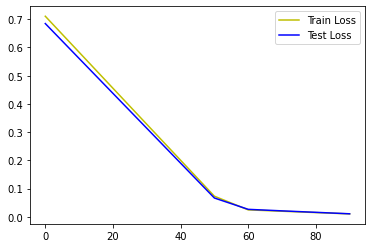

In [99]:
plt.plot(ep, loss_train, c="y", label="Train Loss")
plt.plot(ep, loss_test, c='b', label="Test Loss")
plt.legend()



In [107]:
with torch.inference_mode():
    pred = model(x_test)

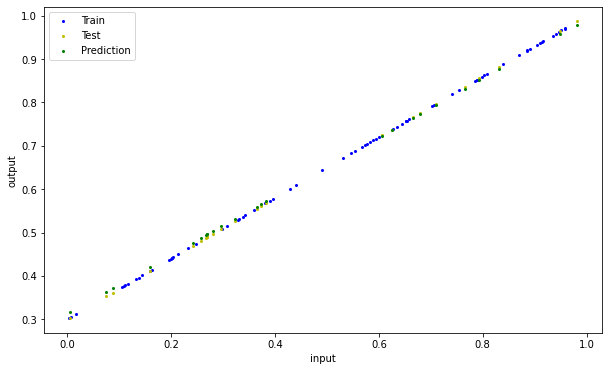

In [108]:
plot(prediction=pred.detach().numpy())

In [109]:
model.state_dict()

OrderedDict([('weight', tensor([0.6785])), ('bias', tensor([0.3126]))])

## <a id='toc1_3_'></a>[Model Saving](#toc0_)

In [111]:
from pathlib import Path
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_SAVE_PATH = MODEL_PATH / "regression.pty"
torch.save(model, MODEL_SAVE_PATH)

## <a id='toc1_4_'></a>[Model Loading](#toc0_)

In [112]:
loaded_model = torch.load(f=MODEL_SAVE_PATH)

In [113]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.6785])), ('bias', tensor([0.3126]))])